In [ ]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [ ]:
train_path= 'cervical fracture/train'
test_path='cervical fracture/val'

In [ ]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
val_datagen= image.ImageDataGenerator(    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 4,
    class_mode = 'binary')
validation_generator = val_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 4,
    shuffle=True,
    class_mode = 'binary')

Found 3800 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', input_shape=(224,224,3), include_top=False)

for layer in base_model.layers:
    layer.trainable=False
model = Sequential()
model.add(base_model)
model.add(GaussianNoise(0.25))
model.add(GlobalAveragePooling2D())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 gaussian_noise (GaussianNoi  (None, 7, 7, 1280)       0         
 se)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                          

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy','Precision','Recall','AUC'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
lrp=ReduceLROnPlateau(monitor="val_accuracy", factor=0.1, patience=2)
filepath='best_model.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
call=[checkpoint,lrp]
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    steps_per_epoch= 50,
    callbacks=call
    )

Epoch 1/10
50/50 [==============================] - ETA: 0s - loss: 0.6479 - accuracy: 0.7300 - precision: 0.7527 - recall: 0.6931 - auc: 0.7548
Epoch 1: val_accuracy improved from -inf to 0.79750, saving model to best_model.h5
50/50 [==============================] - 27s 458ms/step - loss: 0.6479 - accuracy: 0.7300 - precision: 0.7527 - recall: 0.6931 - auc: 0.7548 - val_loss: 0.4703 - val_accuracy: 0.7975 - val_precision: 0.8480 - val_recall: 0.7250 - val_auc: 0.8870 - lr: 0.0010
Epoch 2/10
50/50 [==============================] - ETA: 0s - loss: 0.4997 - accuracy: 0.7450 - precision: 0.7340 - recall: 0.7263 - auc: 0.8350
Epoch 2: val_accuracy did not improve from 0.79750
50/50 [==============================] - 19s 374ms/step - loss: 0.4997 - accuracy: 0.7450 - precision: 0.7340 - recall: 0.7263 - auc: 0.8350 - val_loss: 0.5455 - val_accuracy: 0.7100 - val_precision: 0.8043 - val_recall: 0.5550 - val_auc: 0.8266 - lr: 0.0010
Epoch 3/10
50/50 [==============================] - ETA: 0

In [ ]:
model.evaluate(train_generator)

950/950 [==============================] - 132s 138ms/step - loss: 0.2471 - accuracy: 0.8937 - precision: 0.9304 - recall: 0.8511 - auc: 0.9678


[0.24714785814285278,
 0.8936842083930969,
 0.9303797483444214,
 0.8510526418685913,
 0.967831015586853]

In [ ]:
model.evaluate(validation_generator)

100/100 [==============================] - 12s 116ms/step - loss: 0.3499 - accuracy: 0.8675 - precision: 0.9401 - recall: 0.7850 - auc: 0.9528


[0.3499494791030884,
 0.8675000071525574,
 0.940119743347168,
 0.7850000262260437,
 0.9528000354766846]

1/1 [==============================] - 1s 1s/step
[[0.02042186]]
THE UPLOADED SPINE CT IMAGE IS: Fracture


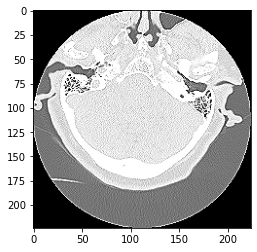

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('cervical fracture/val/fracture/CSFDV1B10 (11)-sharpened.png',target_size=(224,224))
imag = img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)
a=ypred[0]
if a<0.5:
      op="Fracture"
else:
      op="Normal"
plt.imshow(img)
print("THE UPLOADED SPINE CT IMAGE IS: "+str(op))

1/1 [==============================] - 0s 46ms/step
[[0.4333728]]
THE UPLOADED SPINE CT IMAGE IS: Fracture


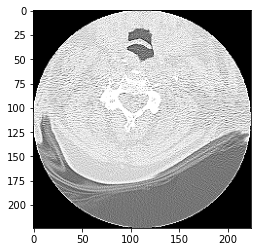

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
img = load_img('cervical fracture/val/normal/CSFDV1B10 (100)-sharpened.png',target_size=(224,224))
imag = img_to_array(img)
imaga = np.expand_dims(imag,axis=0)
ypred = model.predict(imaga)
print(ypred)
a=ypred[0]
if a<0.5:
      op="Fracture"
else:
      op="Normal"
plt.imshow(img)
print("THE UPLOADED SPINE CT IMAGE IS: "+str(op))
